In [1]:
#Pitch

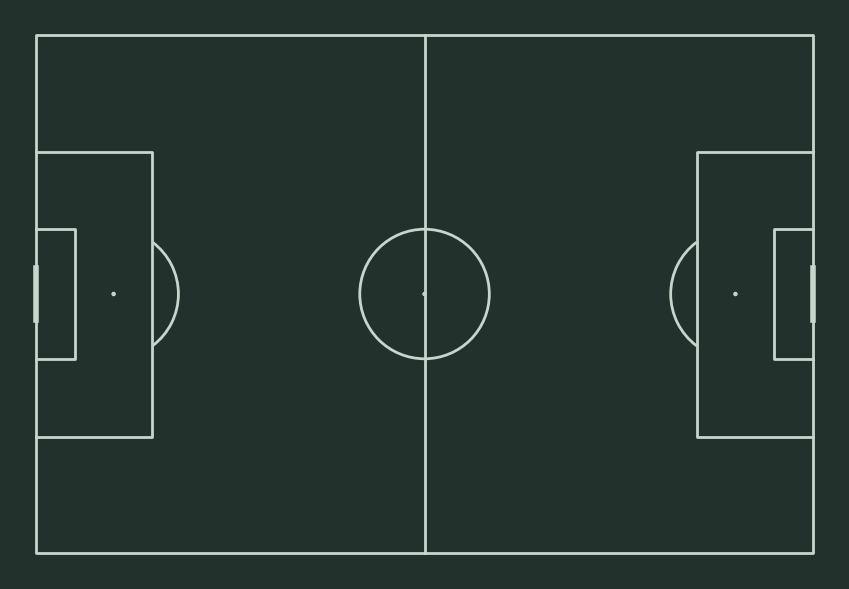

In [3]:
from mplsoccer.pitch import Pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(10, 6), constrained_layout=False, tight_layout=True)
fig.set_facecolor('#22312b')

In [4]:
#Passmap

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
import seaborn as sns

In [4]:
df=pd.read_csv("C:/Users/K Raghunandan/OneDrive/Desktop/Raghu/Kickoff/CSV Files/messibetis.csv")
df.head()

,player,minute,second,x,y,type,outcome,endX,endY
0,messi,45,0,50,50,Pass,Successful,40,43
1,messi,45,25,63,48,Pass,Successful,75,83
2,messi,46,4,74,58,Pass,Successful,71,65
3,messi,46,7,76,68,Pass,Successful,95,78
4,messi,46,55,100,1,Pass,Unsuccessful,96,38


In [5]:
df["x"]=df["x"]*1.2
df["y"]=df["y"]*.8
df["endX"]=df["endX"]*1.2
df["endY"]=df["endY"]*.8

In [6]:
df.head()

,player,minute,second,x,y,type,outcome,endX,endY
0,messi,45,0,60.0,40.0,Pass,Successful,48.0,34.4
1,messi,45,25,75.6,38.4,Pass,Successful,90.0,66.4
2,messi,46,4,88.8,46.4,Pass,Successful,85.2,52.0
3,messi,46,7,91.2,54.4,Pass,Successful,114.0,62.4
4,messi,46,55,120.0,0.8,Pass,Unsuccessful,115.2,30.4


Text(5, 70, 'Unseuccessful Pass')

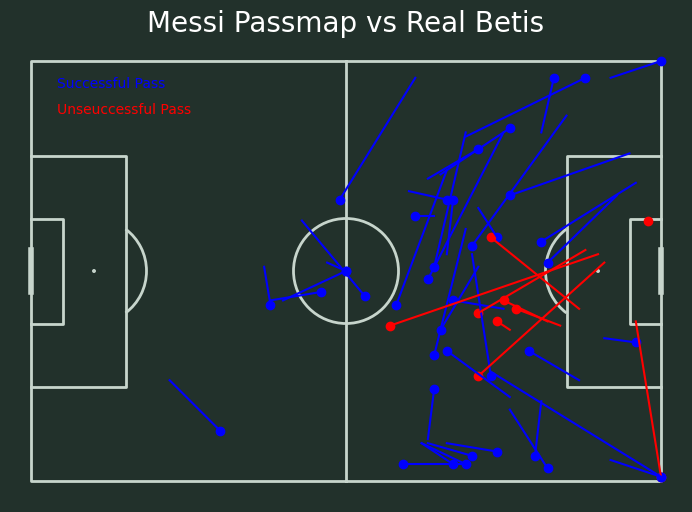

In [7]:
fig, ax= plt.subplots(figsize=(10.5,6))
fig.set_facecolor("#22312b")
ax.patch.set_facecolor("#22312b")

pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
pitch.draw(ax=ax, constrained_layout=True, tight_layout=False)
plt.gca().invert_yaxis()

for x in range(len(df["x"])):
    if df["outcome"][x]=="Successful":
        plt.plot((df["x"][x],df["endX"][x]),(df["y"][x],df["endY"][x]),color="blue")
        plt.scatter(df["x"][x],df["y"][x],color="blue")
    if df["outcome"][x]=="Unsuccessful":
        plt.plot((df["x"][x],df["endX"][x]),(df["y"][x],df["endY"][x]),color="red")
        plt.scatter(df["x"][x],df["y"][x],color="red")

plt.title("Messi Passmap vs Real Betis",color="white",size="20")
ax.text(5,75,"Successful Pass",color="blue")
ax.text(5,70,"Unseuccessful Pass",color="red")

In [42]:
#Heatmaps

C:\Users\K Raghunandan\AppData\Local\Temp\ipykernel_18620\1783716672.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kde=sns.kdeplot(


Text(5, 70, 'Unseuccessful Pass')

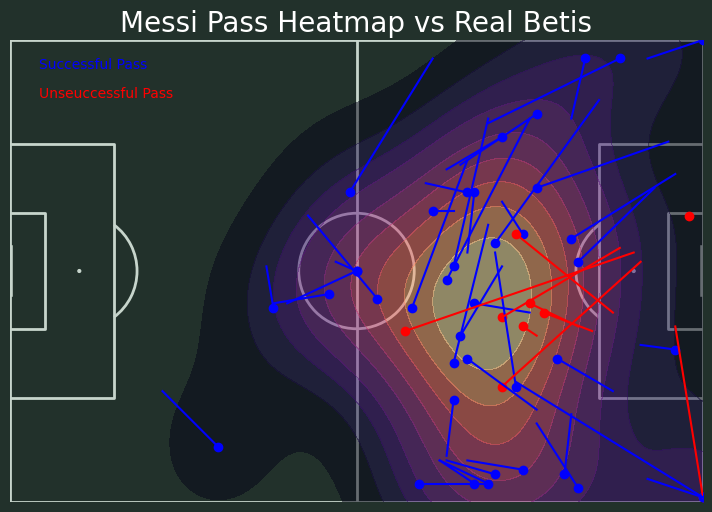

In [54]:
fig, ax= plt.subplots(figsize=(10.5,6))
fig.set_facecolor("#22312b")
ax.patch.set_facecolor("#22312b")

pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
pitch.draw(ax=ax, constrained_layout=True, tight_layout=False)
plt.gca().invert_yaxis()

#heatmap
kde=sns.kdeplot(
    data=df, x="x", y="y",
    shade=True,
    shade_lowest=False,
    alpha=.5,
    bw_adjust=1,
    n_levels=10,
    cmap="magma"
)

for x in range(len(df["x"])):
    if df["outcome"][x]=="Successful":
        plt.plot((df["x"][x],df["endX"][x]),(df["y"][x],df["endY"][x]),color="blue")
        plt.scatter(df["x"][x],df["y"][x],color="blue")
    if df["outcome"][x]=="Unsuccessful":
        plt.plot((df["x"][x],df["endX"][x]),(df["y"][x],df["endY"][x]),color="red")
        plt.scatter(df["x"][x],df["y"][x],color="red")

plt.xlim(0,120)
plt.ylim(0,80)

plt.title("Messi Pass Heatmap vs Real Betis",color="white",size="20")
ax.text(5,75,"Successful Pass",color="blue")
ax.text(5,70,"Unseuccessful Pass",color="red")

In [55]:
#Shotmap

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mplsoccer.pitch import Pitch, VerticalPitch

In [69]:
text_color="w"

In [70]:
data=pd.read_csv("C:/Users/K Raghunandan/OneDrive/Desktop/Raghu/Kickoff/shotmaps.csv")
data.head()

,minute,second,team,x,y,outcome
0,21,42,Barcelona,50.88,85.20,Saved
1,29,33,Barcelona,34.96,91.68,Missed
2,35,3,Barcelona,44.40,101.64,Saved
3,41,3,Barcelona,27.92,96.36,Saved
4,42,9,Barcelona,50.40,104.88,Saved


Text(2, 68, 'Post')

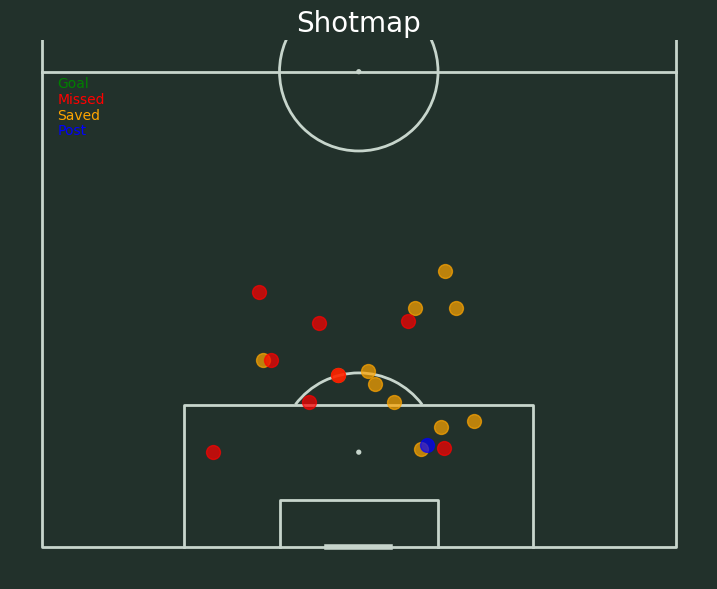

In [90]:
fig, ax=plt.subplots(figsize=(10.5,7))
fig.set_facecolor("#22312b")
ax.patch.set_facecolor("#22312b")

pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc', half=True)
pitch.draw(ax=ax, constrained_layout=True, tight_layout=False )
plt.gca().invert_yaxis()

for x in range(len(data["x"])):
    if data["outcome"][x]=="Saved":
        plt.scatter(data["x"][x],data["y"][x],color="orange",s=100,alpha=.7)
    if data["outcome"][x]=="Missed":
        plt.scatter(data["x"][x],data["y"][x],color="red",s=100,alpha=.7)
    if data["outcome"][x]=="Post":
        plt.scatter(data["x"][x],data["y"][x],color="blue",s=100,alpha=.7)
    if data["outcome"][x]=="Goal":
        plt.scatter(data["x"][x],data["y"][x],color="green",s=100,alpha=.7)

plt.title("Shotmap",color="white",size="20")
ax.text(2,62,"Goal",color="green")
ax.text(2,64,"Missed",color="red")
ax.text(2,66,"Saved",color="orange")
ax.text(2,68,"Post",color="blue")